In [2]:
import pandas as pd
from pandas import DataFrame

import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline
sns.set(style='whitegrid', context='notebook')

In [3]:
CSGOplayerstats = pd.read_csv('counter-strike/playerStats.csv')
CSGOplayerstats.head(10)

,Map,Player,Kills,Deaths,ADR,KAST%,Rating,MatchID
0,Nuke,4216,22,19,85.0,69.0,1.17,2311133/binary-dragons-vs-alpha-binary-dragons...
1,Nuke,3543,26,23,83.5,58.6,1.10,2311133/binary-dragons-vs-alpha-binary-dragons...
2,Nuke,3972,20,23,78.2,75.9,1.02,2311133/binary-dragons-vs-alpha-binary-dragons...
3,Nuke,2476,17,20,68.1,79.3,0.97,2311133/binary-dragons-vs-alpha-binary-dragons...
4,Nuke,2299,17,20,66.3,65.5,0.86,2311133/binary-dragons-vs-alpha-binary-dragons...
5,Nuke,11915,28,21,99.8,65.5,1.35,2311133/binary-dragons-vs-alpha-binary-dragons...
6,Nuke,12802,20,17,78.2,75.9,1.20,2311133/binary-dragons-vs-alpha-binary-dragons...
7,Nuke,7590,21,24,85.6,65.5,1.03,2311133/binary-dragons-vs-alpha-binary-dragons...
8,Nuke,2982,18,20,66.6,69.0,1.00,2311133/binary-dragons-vs-alpha-binary-dragons...
9,Nuke,9903,18,20,57.5,65.5,0.87,2311133/binary-dragons-vs-alpha-binary-dragons...


In [4]:
train=CSGOplayerstats.sample(frac=0.8,random_state=200)
test=CSGOplayerstats.drop(train.index)


In [5]:
Kills = CSGOplayerstats['Kills']
sum_kills = Kills.sum()
num_players = Kills.size# when players is an Series .size returns its length
avg_kills = sum_kills/num_players
avg_kills2 = Kills.mean() # if you just want the average, the .mean() function
print("average kills via method 1: ", avg_kills)
print("average kills via method 2: ", avg_kills2)

average kills via method 1:  17.716625472998096
average kills via method 2:  17.716625472998096


In [6]:
def simple_linear_regression(input_feature, output):    
    N = output.size
    
    # compute the mean of  input_feature and output
    
    # compute the product of the output and the input_feature and its mean
    input_output_prod = input_feature * output
    # compute the squared value of the input_feature and its mean
    input_squared = input_feature * input_feature
    # use the formula for the slope
    slope = (input_output_prod.sum() - (input_feature.sum() * output.sum())/N) / (input_squared.sum() - (input_feature.sum() * input_feature.sum())/N)
    # use the formula for the intercept
    intercept = output.mean() - slope * input_feature.mean()
    return (intercept, slope)

In [7]:
kills_intercept, kills_slope = simple_linear_regression(train['Rating'], train['Kills'])

print("Intercept: ", kills_intercept)
print("Slope: ", kills_slope)

Intercept:  3.8545948499076346
Slope:  13.043155049237484


In [8]:

def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + slope * input_feature
    return predicted_values


In [9]:
    my_Rating = 1
estimated_kills = get_regression_predictions(my_Rating, kills_intercept, kills_slope)
print("The estimated Kills for a player with %d Ratings is %.2f" % (my_Rating, estimated_kills))

The estimated Kills for a player with 1 Ratings is 16.90


In [10]:
deaths_intercept, deaths_slope = simple_linear_regression(train['Rating'], train['Deaths'])

print("Intercept: ", deaths_intercept)
print("Slope: ", deaths_slope)

Intercept:  24.639342211487197
Slope:  -6.484443615731468


In [11]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + slope * input_feature
    return predicted_values

In [12]:
my_Rating = 1
estimated_deaths = get_regression_predictions(my_Rating, deaths_intercept, deaths_slope)
print("The estimated Deaths for a player with %d Ratings is %.2f" % (my_Rating, estimated_deaths))

The estimated Deaths for a player with 1 Ratings is 18.15


# Testing the model

In [13]:
ADR_intercept, ADR_slope = simple_linear_regression(train['Rating'], train['ADR'])

print("Intercept: ", ADR_intercept)
print("Slope: ", ADR_slope)

Intercept:  24.79275425202846
Slope:  47.78609616176637


In [14]:
# Compute Residual Sum of Square when using ADR(Assist Death Ratio) on TEST data:
ADR_test_rss = (test['ADR'], test['Rating'], ADR_intercept, ADR_slope)
ADR_test_rss

(0          85.0
 4          66.3
 9          57.5
 13         59.2
 23         62.5
 27         73.9
 33         46.7
 41         85.7
 56         94.5
 57         76.8
 59         53.6
 68         56.6
 70         91.1
 71         64.3
 75        123.7
 76         84.2
 78         73.3
 82         80.5
 86         93.6
 97         69.8
 99         40.3
 101       110.2
 105        53.2
 112        59.5
 113        72.4
 137        62.1
 163        73.2
 176        72.5
 178        67.8
 180       135.3
           ...  
 228445     77.3
 228450    122.6
 228452     80.9
 228454     51.7
 228462     73.1
 228471    108.1
 228472     73.8
 228475     88.1
 228481     88.6
 228485     76.3
 228493     80.3
 228503     62.4
 228505    106.0
 228508     63.3
 228512     77.1
 228515    109.7
 228522     81.3
 228527    108.4
 228528     66.8
 228530     87.0
 228535     85.0
 228544     58.0
 228554     53.6
 228569     57.8
 228585     86.5
 228586     79.4
 228588     92.3
 228590     74

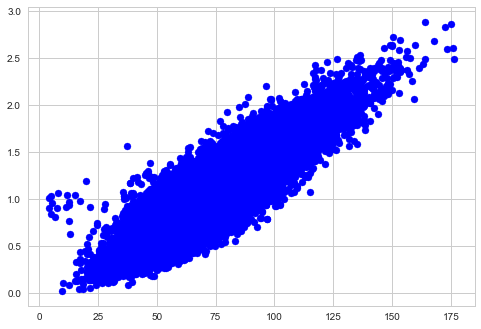

In [15]:
plt.figure()
plt.scatter(x=test[['ADR']], y=test['Rating'], marker='o', c='b')

In [16]:
# Compute Residual Sum of Square when using Kills on TEST data:
Kills_test_rss = (test['Kills'], test['Rating'], kills_intercept, kills_slope)
Kills_test_rss

(0         22
 4         17
 9         18
 13        15
 23        14
 27        17
 33         9
 41        27
 56        24
 57        20
 59        13
 68         9
 70        19
 71        19
 75        33
 76        18
 78        19
 82        19
 86        25
 97        11
 99         8
 101       19
 105        7
 112        9
 113        8
 137       19
 163       16
 176       22
 178       18
 180       31
           ..
 228445    20
 228450    30
 228452    21
 228454    15
 228462    17
 228471    21
 228472    16
 228475    23
 228481    23
 228485    20
 228493    19
 228503    11
 228505    24
 228508    16
 228512    20
 228515    27
 228522    18
 228527    18
 228528    14
 228530    15
 228535    22
 228544    12
 228554    14
 228569     8
 228585    22
 228586    18
 228588    16
 228590    13
 228591    15
 228593    10
 Name: Kills, Length: 45719, dtype: int64, 0         1.17
 4         0.86
 9         0.87
 13        1.22
 23        0.81
 27        1.08
 33     

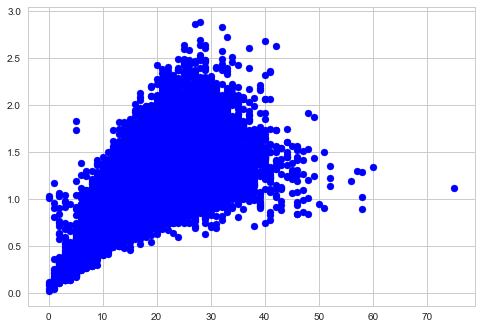

In [17]:
plt.figure()
plt.scatter(x=test[['Kills']], y=test['Rating'], marker='o', c='b')

In [18]:
X = CSGOplayerstats[['Player', 'Deaths', 'KAST%', 'Rating']]
y = CSGOplayerstats['Kills']

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lm = LinearRegression()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [31]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
predicted= lm.predict(X_test)
predicted

array([  5.14925019,  27.09242871,   7.04443451, ...,  24.86554315,
        22.12241401,  14.28948646])

In [33]:
lm.score(X,y)
#Accuracy score for Linear Regression is 86%

0.86268682797075147